In [74]:
import pandas as pd

# Load Excel file 
file_path = "RAW_DATA_IMPORT.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

In [75]:
# Select Customers table
customers_df = sheets_dict["Customers"]

In [76]:
# ----------------------------
# Data Dictionary: Customers
# ----------------------------

customers_dict = {
    "customer_ID": {
        "dtype": "int64",
        "description": "Unique identifier for each customer",
        "nulls": customers_df["customer_ID"].isnull().sum(),
        "observations": "Primary key, no duplicates expected",
        "handling": "Keep as is, ensure uniqueness"
    },
    "Contact_Last_Name": {
        "dtype": "object",
        "description": "Last name of the customer",
        "nulls": customers_df["Contact_Last_Name"].isnull().sum(),
        "observations": "Consistent text data",
        "handling": "No action required"
    },
    "Contact_First_Name": {
        "dtype": "object",
        "description": "First name of the customer",
        "nulls": customers_df["Contact_First_Name"].isnull().sum(),
        "observations": "Consistent text data",
        "handling": "No action required"
    },
    "Street": {
        "dtype": "object",
        "description": "Street address",
        "nulls": customers_df["Street"].isnull().sum(),
        "observations": "Consistent text data",
        "handling": "No action required"
    },
    "City": {
        "dtype": "object",
        "description": "City of residence",
        "nulls": customers_df["City"].isnull().sum(),
        "observations": "Consistent text data",
        "handling": "No action required"
    },
    "Cust_State": {
        "dtype": "object",
        "description": "State of residence",
        "nulls": customers_df["Cust_State"].isnull().sum(),
        "observations": "Some states may have inconsistent spellings",
        "handling": "Standardize state values"
    },
    "Zip": {
        "dtype": "int64",
        "description": "Zip code",
        "nulls": customers_df["Zip"].isnull().sum(),
        "observations": "Stored as integer",
        "handling": "Convert to string if needed (to preserve leading zeros)"
    },
    "Country": {
        "dtype": "object",
        "description": "Country name",
        "nulls": customers_df["Country"].isnull().sum(),
        "observations": "Should be standardized (e.g., 'USA' vs 'United States')",
        "handling": "Standardize values"
    },
    "Age": {
        "dtype": "int64",
        "description": "Age of the customer",
        "nulls": customers_df["Age"].isnull().sum(),
        "observations": "Numeric, no missing values",
        "handling": "Validate ranges (e.g., >18, <100)"
    },
    "Marital_Status": {
        "dtype": "object",
        "description": "Marital status (e.g., Single, Married)",
        "nulls": customers_df["Marital_Status"].isnull().sum(),
        "observations": "Missing values present",
        "handling": "Fill with 'Unknown' or mode"
    },
    "Gender": {
        "dtype": "object",
        "description": "Gender of the customer",
        "nulls": customers_df["Gender"].isnull().sum(),
        "observations": "Missing values present",
        "handling": "Fill with 'Unknown' or impute"
    },
    "Num_Dependants": {
        "dtype": "int64",
        "description": "Number of dependents",
        "nulls": customers_df["Num_Dependants"].isnull().sum(),
        "observations": "Numeric, no missing values",
        "handling": "Validate ranges (e.g., not negative)"
    }
}

In [77]:
# Pretty print the data dictionary
import pprint
pprint.pprint(customers_dict)

{'Age': {'description': 'Age of the customer',
         'dtype': 'int64',
         'handling': 'Validate ranges (e.g., >18, <100)',
         'nulls': np.int64(0),
         'observations': 'Numeric, no missing values'},
 'City': {'description': 'City of residence',
          'dtype': 'object',
          'handling': 'No action required',
          'nulls': np.int64(0),
          'observations': 'Consistent text data'},
 'Contact_First_Name': {'description': 'First name of the customer',
                        'dtype': 'object',
                        'handling': 'No action required',
                        'nulls': np.int64(0),
                        'observations': 'Consistent text data'},
 'Contact_Last_Name': {'description': 'Last name of the customer',
                       'dtype': 'object',
                       'handling': 'No action required',
                       'nulls': np.int64(0),
                       'observations': 'Consistent text data'},
 'Country': {'descripti

In [78]:
import pandas as pd

# Load all sheets from the provided Excel file
EXCEL_PATH = "RAW_DATA_IMPORT.xlsx"
sheets_dict = pd.read_excel(EXCEL_PATH, sheet_name=None)

# Show table names with row and column counts
summary_df = pd.DataFrame({
    "table_name": list(sheets_dict.keys()),
    "n_rows": [len(df) for df in sheets_dict.values()],
    "n_cols": [len(df.columns) for df in sheets_dict.values()],
})

summary_df


,table_name,n_rows,n_cols
0,Customers,10000,12
1,Customer_Assets,50000,4
2,Asset_Objectives,5,2
3,Customer_Answers,80000,2
4,Questions,8,3
5,Answers,35,5
6,Risk_Profile,5,2
7,Asset_Classes,8,5
8,Potential_Funds,5,5
9,Fund_Targets,5,6


In [79]:
def explore_table(table_name, df):
    print(f"🔍 Exploring Table: {table_name}")
    print("-" * 50)
    
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")
    
    print("Column Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nUnique Values per Column:")
    for col in df.columns:
        unique_count = df[col].nunique(dropna=True)
        print(f"  {col}: {unique_count}")
    
    constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
    if constant_cols:
        print(f"\n⚠ Constant columns: {constant_cols}")
    
    potential_ids = []
    for col in df.columns:
        unique_count = df[col].nunique(dropna=True)
        if unique_count >= len(df) * 0.95 and df[col].isnull().sum() == 0:
            potential_ids.append(col)
    if potential_ids:
        print(f"\n🆔 Potential ID columns: {potential_ids}")
    
    print("=" * 50 + "\n")

# Explore all tables automatically
for table_name, df in sheets_dict.items():
    explore_table(table_name, df)


🔍 Exploring Table: Customers
--------------------------------------------------
Rows: 10000, Columns: 12

Column Data Types:
customer_ID            int64
Contact_Last_Name     object
Contact_First_Name    object
Street                object
City                  object
Cust_State            object
Zip                    int64
Country               object
Age                    int64
Marital_Status        object
Gender                object
Num_Dependants         int64
dtype: object

Missing Values:
customer_ID              0
Contact_Last_Name        0
Contact_First_Name       0
Street                   0
City                     0
Cust_State               0
Zip                      0
Country                  0
Age                      0
Marital_Status        1889
Gender                 990
Num_Dependants           0
dtype: int64

Unique Values per Column:
  customer_ID: 10000
  Contact_Last_Name: 1000
  Contact_First_Name: 1167
  Street: 10000
  City: 186
  Cust_State: 39
  Zip: 5918
 

In [80]:
def explore_table(table_name, df):
    """
    Explore the structure and properties of a table.
    Prints insights about the dataset.
    
    Parameters:
    table_name : str
        Name of the table.
    df : pandas.DataFrame
        The table data.
    """
    print(f"🔍 Exploring Table: {table_name}")
    print("-" * 50)
    
    # Print the number of rows and columns
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}\n")
    
    # Print data types of each column
    print("📂 Column Data Types:")
    print(df.dtypes)
    print("\n")
    
    # Print count of missing values per column
    print("⚠ Missing Values Count:")
    print(df.isnull().sum())
    print("\n")
    
    # Print number of unique values per column
    print("🔢 Unique Values per Column:")
    for col in df.columns:
        unique_count = df[col].nunique(dropna=True)
        print(f"  {col}: {unique_count}")
    print("\n")
    
    # Check for constant columns (same value throughout)
    constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
    if constant_cols:
        print(f"❗ Constant Columns: {constant_cols}")
    else:
        print("✅ No constant columns detected.")
    
    # Identify potential ID columns
    potential_ids = []
    for col in df.columns:
        unique_count = df[col].nunique(dropna=True)
        missing_count = df[col].isnull().sum()
        # Criteria: near full uniqueness and no missing values
        if unique_count >= len(df) * 0.95 and missing_count == 0:
            potential_ids.append(col)
    if potential_ids:
        print(f"🆔 Potential ID Columns: {potential_ids}")
    else:
        print("✅ No obvious ID columns detected.")
    
    print("=" * 50 + "\n")


In [81]:
# Loop through all tables and explore them using the function
for table_name, df in sheets_dict.items():
    explore_table(table_name, df)


🔍 Exploring Table: Customers
--------------------------------------------------
Total Rows: 10000, Total Columns: 12

📂 Column Data Types:
customer_ID            int64
Contact_Last_Name     object
Contact_First_Name    object
Street                object
City                  object
Cust_State            object
Zip                    int64
Country               object
Age                    int64
Marital_Status        object
Gender                object
Num_Dependants         int64
dtype: object


⚠ Missing Values Count:
customer_ID              0
Contact_Last_Name        0
Contact_First_Name       0
Street                   0
City                     0
Cust_State               0
Zip                      0
Country                  0
Age                      0
Marital_Status        1889
Gender                 990
Num_Dependants           0
dtype: int64


🔢 Unique Values per Column:
  customer_ID: 10000
  Contact_Last_Name: 1000
  Contact_First_Name: 1167
  Street: 10000
  City: 186
  Cu

In [82]:
# Select the first table from your dataset
table_name = list(sheets_dict.keys())[0]
df = sheets_dict[table_name]

# Explore this table
print(f"🔍 Exploring Table: {table_name}")
print("-" * 50)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("📂 Column Data Types:")
print(df.dtypes)
print("\n")

print("⚠ Missing Values Count:")
print(df.isnull().sum())
print("\n")

print("🔢 Unique Values per Column:")
for col in df.columns:
    unique_count = df[col].nunique(dropna=True)
    print(f"  {col}: {unique_count}")
print("\n")

constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
if constant_cols:
    print(f"❗ Constant Columns: {constant_cols}")
else:
    print("✅ No constant columns detected.")

potential_ids = []
for col in df.columns:
    unique_count = df[col].nunique(dropna=True)
    missing_count = df[col].isnull().sum()
    if unique_count >= len(df) * 0.95 and missing_count == 0:
        potential_ids.append(col)
if potential_ids:
    print(f"🆔 Potential ID Columns: {potential_ids}")
else:
    print("✅ No obvious ID columns detected.")

print("=" * 50 + "\n")


🔍 Exploring Table: Customers
--------------------------------------------------
Rows: 10000, Columns: 12

📂 Column Data Types:
customer_ID            int64
Contact_Last_Name     object
Contact_First_Name    object
Street                object
City                  object
Cust_State            object
Zip                    int64
Country               object
Age                    int64
Marital_Status        object
Gender                object
Num_Dependants         int64
dtype: object


⚠ Missing Values Count:
customer_ID              0
Contact_Last_Name        0
Contact_First_Name       0
Street                   0
City                     0
Cust_State               0
Zip                      0
Country                  0
Age                      0
Marital_Status        1889
Gender                 990
Num_Dependants           0
dtype: int64


🔢 Unique Values per Column:
  customer_ID: 10000
  Contact_Last_Name: 1000
  Contact_First_Name: 1167
  Street: 10000
  City: 186
  Cust_State: 39

In [83]:
# Create a DataFrame to store documentation for all columns in all tables
documentation = []

# Iterate through each table
for table_name, df in sheets_dict.items():
    for col in df.columns:
        # Get basic statistics
        dtype = str(df[col].dtype)
        unique_count = df[col].nunique(dropna=True)
        missing_count = df[col].isnull().sum()
        
        # Initialize fields
        business_definition = "To be defined based on business context"
        
        # Allowed values: Provide hints if possible
        if unique_count < 20:
            allowed_values_notes = f"Expected values: {df[col].dropna().unique().tolist()}"
        else:
            allowed_values_notes = "Large variety of values, refer to business rules"
        
        # Owner or steward placeholder
        owner_or_steward = "To be assigned"
        
        # Sensitivity: Simple rule based on column names
        if any(x in col.lower() for x in ["name", "email", "phone", "address", "dob", "ssn", "id"]):
            sensitivity = "PII or Sensitive"
        else:
            sensitivity = "None"
        
        # Quality rules placeholder
        if missing_count > 0:
            quality_rules = "Check for missing values; consider imputation or flagging"
        else:
            quality_rules = "No missing values expected; validate uniqueness or range if applicable"
        
        # Append to documentation list
        documentation.append({
            "table_name": table_name,
            "column_name": col,
            "dtype": dtype,
            "unique_count": unique_count,
            "missing_count": missing_count,
        })

# Convert to DataFrame
doc_df = pd.DataFrame(documentation)

# Display the first few rows
doc_df.head()


,table_name,column_name,dtype,unique_count,missing_count
0,Customers,customer_ID,int64,10000,0
1,Customers,Contact_Last_Name,object,1000,0
2,Customers,Contact_First_Name,object,1167,0
3,Customers,Street,object,10000,0
4,Customers,City,object,186,0


In [84]:
# Initialize an empty list to collect documentation entries
documentation = []

# Loop through all tables in the dataset
for table_name, df in sheets_dict.items():
    for col in df.columns:
        # Get basic statistics for this column
        dtype = str(df[col].dtype)
        unique_count = df[col].nunique(dropna=True)
        missing_count = df[col].isnull().sum()
        
        # Business definition – placeholder
        business_definition = "To be defined based on business context"
        
        # Allowed values – if few unique values, list them; else give general note
        if unique_count < 20:
            allowed_values_notes = f"Expected values: {df[col].dropna().unique().tolist()}"
        else:
            allowed_values_notes = "Large variety of values, refer to business rules"
        
        # Owner or steward placeholder
        owner_or_steward = "To be assigned"
        
        # Sensitivity – flag if column name hints at personal data
        if any(keyword in col.lower() for keyword in ["name", "email", "phone", "address", "dob", "ssn", "id"]):
            sensitivity = "PII or Sensitive"
        else:
            sensitivity = "None"
        
        # Quality rules – simple suggestions based on missing data
        if missing_count > 0:
            quality_rules = "Check for missing values; consider imputation or flagging"
        else:
            quality_rules = "No missing values expected; validate uniqueness or range if applicable"
        
        # Append this information to the documentation list
        documentation.append({
            "table_name": table_name,
            "column_name": col,
            "dtype": dtype,
            "unique_count": unique_count,
            "missing_count": missing_count,
        })

# Convert the list of dictionaries into a DataFrame
doc_df = pd.DataFrame(documentation)


pd.set_option('display.max_rows', None)
# Show the first few entries to verify
doc_df


,table_name,column_name,dtype,unique_count,missing_count
0,Customers,customer_ID,int64,10000,0
1,Customers,Contact_Last_Name,object,1000,0
2,Customers,Contact_First_Name,object,1167,0
3,Customers,Street,object,10000,0
4,Customers,City,object,186,0
5,Customers,Cust_State,object,39,0
6,Customers,Zip,int64,5918,0
7,Customers,Country,object,1,0
8,Customers,Age,int64,43,0
9,Customers,Marital_Status,object,3,1889


| Column Name                | Description                                                                              |
| -------------------------- | ---------------------------------------------------------------------------------------- |
| **table\_name**            | Name of the table the column belongs to.                                                 |
| **column\_name**           | Name of the column within the table.                                                     |
| **dtype**                  | Data type of the column (e.g., int, float, object, datetime).                            |
| **unique\_count**          | Number of distinct values in the column. Helps identify identifiers or categorical data. |
| **missing\_count**         | Number of missing or null values in the column. Indicates data column.                |


In [85]:
# Save the completed documentation into an Excel file
output_path = "documented_data_dictionary.xlsx"
doc_df.to_excel(output_path, index=False)

print(f"✅ Documented Data Dictionary for all tables saved at: {output_path}")


✅ Documented Data Dictionary for all tables saved at: documented_data_dictionary.xlsx


### ✅ Step 4 – Identify Data Anomalies
➤ Goal:

Automatically detect common issues in the data such as:

Missing values → Where data is incomplete.

Constant columns → Where data doesn’t vary and may be useless.

High cardinality → Where columns behave like identifiers or have too many unique values.

Outliers or invalid data → Based on simple rules like range checks.

In [86]:
# Create a DataFrame to store missing value anomalies for Customers table only
missing_anomalies = []

# Select the Customers table
customers_df = sheets_dict["Customers"]
total_rows = len(customers_df)

# Loop through each column in the Customers table
for col in customers_df.columns:
    missing_count = customers_df[col].isnull().sum()  # Count missing values
    missing_pct = (missing_count / total_rows) * 100  # Calculate percentage of missing values
    
    # If there are missing values, flag this column
    if missing_count > 0:
        missing_anomalies.append({
            "table_name": "Customers",
            "column_name": col,
            "issue": "Missing Values",
            "missing_count": missing_count,
            "missing_percentage": round(missing_pct, 2)
        })

# Convert the list of anomalies to a DataFrame
missing_df = pd.DataFrame(missing_anomalies)

# Display the missing value anomalies, if any
missing_df


,table_name,column_name,issue,missing_count,missing_percentage
0,Customers,Marital_Status,Missing Values,1889,18.89
1,Customers,Gender,Missing Values,990,9.90


In [87]:
# Create a DataFrame to store constant column anomalies for Customers table only
constant_anomalies = []

# Select the Customers table
customers_df = sheets_dict["Customers"]

# Loop through each column in the Customers table
for col in customers_df.columns:
    unique_count = customers_df[col].nunique(dropna=True)  # Count unique non-null values
    
    if unique_count <= 1:  # Check if the column is constant
        constant_anomalies.append({
            "table_name": "Customers",
            "column_name": col,
            "issue": "Constant Column",
            "unique_values": unique_count
        })

# Convert the list of anomalies to a DataFrame
constant_df = pd.DataFrame(constant_anomalies)

# Display the constant column anomalies, if any
constant_df



,table_name,column_name,issue,unique_values
0,Customers,Country,Constant Column,1


In [88]:
# Create a DataFrame to store high cardinality anomalies for Customers table only
high_cardinality_anomalies = []

# Select the Customers table
customers_df = sheets_dict["Customers"]
total_rows = len(customers_df)

# Loop through each column in the Customers table
for col in customers_df.columns:
    unique_count = customers_df[col].nunique(dropna=True)  # Count unique non-null values
    missing_count = customers_df[col].isnull().sum()       # Count missing values
    
    # Criteria: More than 95% unique values and no missing values
    if unique_count >= total_rows * 0.95 and missing_count == 0:
        high_cardinality_anomalies.append({
            "table_name": "Customers",
            "column_name": col,
            "issue": "High Cardinality",
            "unique_values": unique_count,
            "total_rows": total_rows
        })

# Convert the list of anomalies to a DataFrame
high_cardinality_df = pd.DataFrame(high_cardinality_anomalies)

# Display the high cardinality anomalies, if any
high_cardinality_df


,table_name,column_name,issue,unique_values,total_rows
0,Customers,customer_ID,High Cardinality,10000,10000
1,Customers,Street,High Cardinality,10000,10000


Missing Values – Bar chart showing columns with missing data.

Constant Columns – Simple table or highlight if needed.

High Cardinality – Bar chart showing columns with high uniqueness.

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Allow plots to appear inline in the notebook
%matplotlib inline


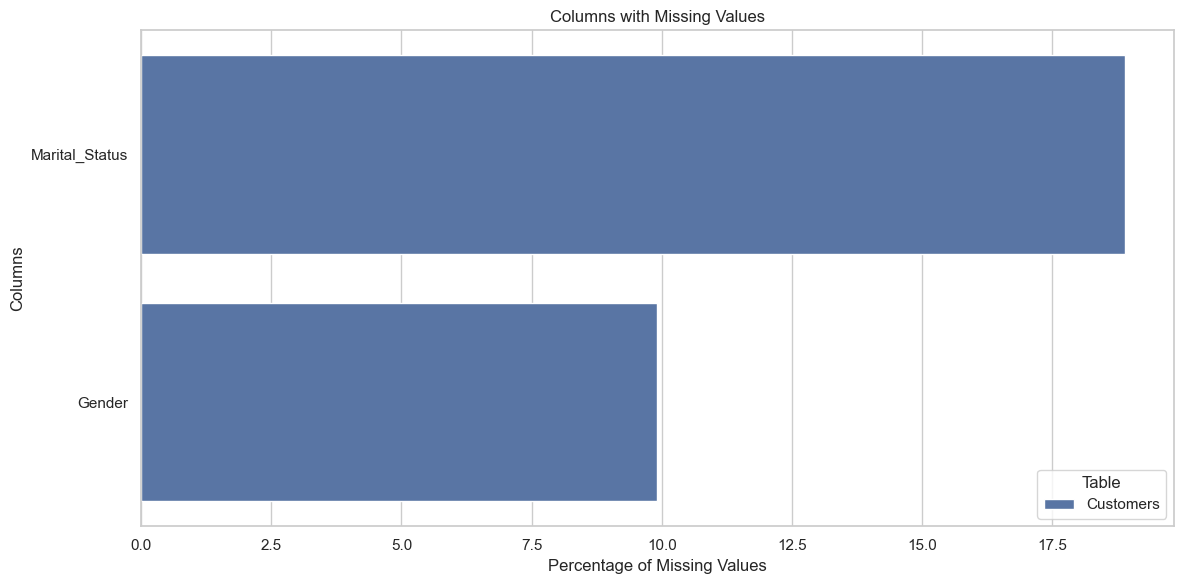

In [90]:
# Plot missing values if any exist
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=missing_df.sort_values(by="missing_percentage", ascending=False),
        x="missing_percentage", 
        y="column_name", 
        hue="table_name",
        dodge=False
    )
    plt.title("Columns with Missing Values")
    plt.xlabel("Percentage of Missing Values")
    plt.ylabel("Columns")
    plt.legend(title="Table")
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing value anomalies detected.")


In [91]:
# Show constant columns if any
if not constant_df.empty:
    print("📌 Constant Columns Detected:")
    display(constant_df)
else:
    print("✅ No constant columns detected.")


📌 Constant Columns Detected:


,table_name,column_name,issue,unique_values
0,Customers,Country,Constant Column,1


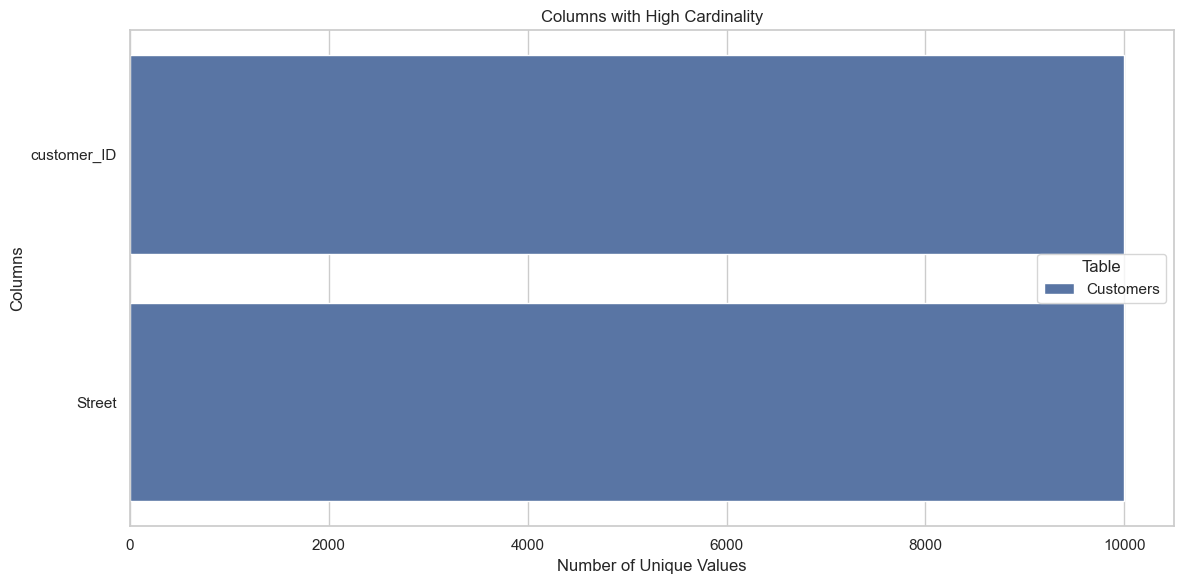

In [92]:
# Plot high cardinality columns if any exist
if not high_cardinality_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=high_cardinality_df.sort_values(by="unique_values", ascending=False),
        x="unique_values", 
        y="column_name", 
        hue="table_name",
        dodge=False
    )
    plt.title("Columns with High Cardinality")
    plt.xlabel("Number of Unique Values")
    plt.ylabel("Columns")
    plt.legend(title="Table")
    plt.tight_layout()
    plt.show()
else:
    print("✅ No high cardinality anomalies detected.")


In [93]:
# Store results for each table
stats_results = {}

# Loop through each table
for table_name, df in sheets_dict.items():
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Create descriptive stats
    describe_df = df.describe(include='all').transpose()
    
    # Compute correlation only if there are numeric columns
    if not numeric_df.empty:
        correlation_df = numeric_df.corr()
    else:
        correlation_df = pd.DataFrame()  # Empty if no numeric data
    
    # Save the results
    stats_results[table_name] = {
        "describe": describe_df,
        "correlation": correlation_df
    }

# Example: Show statistics for the first table
first_table = list(sheets_dict.keys())[0]
print(f"📊 Descriptive Statistics for {first_table}")
display(stats_results[first_table]["describe"])

print(f"\n📈 Correlation Matrix for {first_table}")
if not stats_results[first_table]["correlation"].empty:
    display(stats_results[first_table]["correlation"])
else:
    print("No numeric columns available for correlation.")


📊 Descriptive Statistics for Customers


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_ID,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Contact_Last_Name,10000,1000,Parks,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_First_Name,10000,1167,Lee,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,10000,10000,947-2345 In Ave,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,10000,186,Miami,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cust_State,10000,39,Florida,1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,10000.0,NaN,NaN,NaN,59267.2665,27329.059867,10039.0,35129.5,60203.0,85688.25,99996.0
Country,10000,1,United States,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,55.2951,12.140517,33.0,45.0,57.0,65.0,75.0
Marital_Status,8111,3,Married,4370,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📈 Correlation Matrix for Customers


,customer_ID,Zip,Age,Num_Dependants
customer_ID,1.000000,0.008662,0.733988,-0.004665
Zip,0.008662,1.000000,-0.006644,0.003822
Age,0.733988,-0.006644,1.000000,0.012063
Num_Dependants,-0.004665,0.003822,0.012063,1.000000


In [94]:
# Loop through each table and display its stats
for table_name, result in stats_results.items():
    print(f"\n📊 Descriptive Statistics for '{table_name}'")
    display(result["describe"])
    
    print(f"📈 Correlation Matrix for '{table_name}'")
    if not result["correlation"].empty:
        display(result["correlation"])
    else:
        print("No numeric columns available for correlation.")



📊 Descriptive Statistics for 'Customers'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_ID,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Contact_Last_Name,10000,1000,Parks,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_First_Name,10000,1167,Lee,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,10000,10000,947-2345 In Ave,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,10000,186,Miami,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cust_State,10000,39,Florida,1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,10000.0,NaN,NaN,NaN,59267.2665,27329.059867,10039.0,35129.5,60203.0,85688.25,99996.0
Country,10000,1,United States,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,55.2951,12.140517,33.0,45.0,57.0,65.0,75.0
Marital_Status,8111,3,Married,4370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Customers'


,customer_ID,Zip,Age,Num_Dependants
customer_ID,1.000000,0.008662,0.733988,-0.004665
Zip,0.008662,1.000000,-0.006644,0.003822
Age,0.733988,-0.006644,1.000000,0.012063
Num_Dependants,-0.004665,0.003822,0.012063,1.000000



📊 Descriptive Statistics for 'Customer_Assets'


,count,mean,std,min,25%,50%,75%,max
Customer_Asset_Id,50000.0,2.500050e+04,1.443390e+04,1.000,12500.750,25000.5000,3.750025e+04,5.000000e+04
Customer_ID,50000.0,5.000500e+03,2.886780e+03,1.000,2500.750,5000.5000,7.500250e+03,1.000000e+04
Asset_Objective_ID,50000.0,3.000000e+00,1.414228e+00,1.000,2.000,3.0000,4.000000e+00,5.000000e+00
Total,50000.0,1.248022e+06,1.195035e+06,20.196,390830.749,863138.7648,1.706279e+06,7.476418e+06


📈 Correlation Matrix for 'Customer_Assets'


,Customer_Asset_Id,Customer_ID,Asset_Objective_ID,Total
Customer_Asset_Id,1.000000,2.000000e-01,9.797959e-01,0.078897
Customer_ID,0.200000,1.000000e+00,4.721898e-15,0.065104
Asset_Objective_ID,0.979796,4.721898e-15,1.000000e+00,0.067234
Total,0.078897,6.510406e-02,6.723417e-02,1.000000



📊 Descriptive Statistics for 'Asset_Objectives'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Asset_Objective_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Asset_Objective_Name,5,5,General Savings,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Asset_Objectives'


,Asset_Objective_ID
Asset_Objective_ID,1.0



📊 Descriptive Statistics for 'Customer_Answers'


,count,mean,std,min,25%,50%,75%,max
Customer_ID,80000.0,5000.500000,2886.769374,1.0,2500.75,5000.5,7500.25,10000.0
QA_ID,68432.0,17.679229,10.070142,1.0,9.00,17.0,26.00,35.0


📈 Correlation Matrix for 'Customer_Answers'


,Customer_ID,QA_ID
Customer_ID,1.000000,-0.043108
QA_ID,-0.043108,1.000000



📊 Descriptive Statistics for 'Questions'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
QUESTION_ID,8.0,NaN,NaN,NaN,4.5,2.44949,1.0,2.75,4.5,6.25,8.0
QUESTION_SUBJECT,8,8,Years Experience,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUESTION_TEXT,8,8,How many years from now do you expect to begin...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Questions'


,QUESTION_ID
QUESTION_ID,1.0



📊 Descriptive Statistics for 'Answers'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
QA_ID,35.0,NaN,NaN,NaN,18.0,10.246951,1.0,9.5,18.0,26.5,35.0
QUESTION_ID,35.0,NaN,NaN,NaN,4.342857,2.33821,1.0,2.0,4.0,6.0,8.0
Answer_ID,35.0,NaN,NaN,NaN,3.057143,1.413025,1.0,2.0,3.0,4.0,5.0
ANSWER_TEXT,35,35,1-5 Years,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Profile_ID,35.0,NaN,NaN,NaN,3.085714,1.358447,1.0,2.0,3.0,4.0,5.0


📈 Correlation Matrix for 'Answers'


,QA_ID,QUESTION_ID,Answer_ID,Risk_Profile_ID
QA_ID,1.000000,0.991869,0.166568,0.183824
QUESTION_ID,0.991869,1.000000,0.047308,0.147890
Answer_ID,0.166568,0.047308,1.000000,0.334468
Risk_Profile_ID,0.183824,0.147890,0.334468,1.000000



📊 Descriptive Statistics for 'Risk_Profile'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RISK_PROFILE_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
RISK_PROFILE,5,5,LOW-RISK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Risk_Profile'


,RISK_PROFILE_ID
RISK_PROFILE_ID,1.0



📊 Descriptive Statistics for 'Asset_Classes'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ASSET_CLASS_ID,8.0,NaN,NaN,NaN,4.5,2.44949,1.0,2.75,4.5,6.25,8.0
ASSET_CLASS,8,8,Bonds,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RISK_PROFILE_ID,8.0,NaN,NaN,NaN,3.375,1.407886,1.0,2.75,3.5,4.25,5.0
Flat_Fee,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage_Fee,8.0,NaN,NaN,NaN,0.013112,0.021283,0.0003,0.0003,0.0075,0.01125,0.064


📈 Correlation Matrix for 'Asset_Classes'


,ASSET_CLASS_ID,RISK_PROFILE_ID,Flat_Fee,Percentage_Fee
ASSET_CLASS_ID,1.000000,0.476383,NaN,0.462146
RISK_PROFILE_ID,0.476383,1.000000,NaN,0.495653
Flat_Fee,NaN,NaN,NaN,NaN
Percentage_Fee,0.462146,0.495653,NaN,1.000000



📊 Descriptive Statistics for 'Potential_Funds'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Fund_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Fund_Name,5,5,Scenario 1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fund_Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minimum_Investment_Required,5.0,NaN,NaN,NaN,7320000.0,10704531.750619,100000.0,500000.0,1000000.0,10000000.0,25000000.0
Maximum_Investment_Allowed,5.0,NaN,NaN,NaN,17300000.0,20795432.190748,500000.0,1000000.0,10000000.0,25000000.0,50000000.0


📈 Correlation Matrix for 'Potential_Funds'


,Fund_ID,Fund_Description,Minimum_Investment_Required,Maximum_Investment_Allowed
Fund_ID,1.000000,NaN,0.875905,0.935206
Fund_Description,NaN,NaN,NaN,NaN
Minimum_Investment_Required,0.875905,NaN,1.000000,0.985342
Maximum_Investment_Allowed,0.935206,NaN,0.985342,1.000000



📊 Descriptive Statistics for 'Fund_Targets'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Fund_Target_Id,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Fund_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Asset_Objective_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Engagement_Type_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Frequency_ID,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Target_Description,5,5,sample fund target 1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Fund_Targets'


,Fund_Target_Id,Fund_ID,Asset_Objective_ID,Engagement_Type_ID,Frequency_ID
Fund_Target_Id,1.0,1.0,1.0,1.0,1.0
Fund_ID,1.0,1.0,1.0,1.0,1.0
Asset_Objective_ID,1.0,1.0,1.0,1.0,1.0
Engagement_Type_ID,1.0,1.0,1.0,1.0,1.0
Frequency_ID,1.0,1.0,1.0,1.0,1.0



📊 Descriptive Statistics for 'Fund_Assets'


,count,mean,std,min,25%,50%,75%,max
FUND_ASSET_ID,8.0,4.5,2.449490,1.00,2.75,4.50,6.250,8.00
Fund_ID,8.0,1.0,0.000000,1.00,1.00,1.00,1.000,1.00
Asset_Class_ID,8.0,4.5,2.449490,1.00,2.75,4.50,6.250,8.00
Percent_Of_Fund,8.0,12.5,13.270952,0.27,4.11,8.76,15.835,37.47


📈 Correlation Matrix for 'Fund_Assets'


,FUND_ASSET_ID,Fund_ID,Asset_Class_ID,Percent_Of_Fund
FUND_ASSET_ID,1.000000,NaN,1.000000,0.071809
Fund_ID,NaN,NaN,NaN,NaN
Asset_Class_ID,1.000000,NaN,1.000000,0.071809
Percent_Of_Fund,0.071809,NaN,0.071809,1.000000



📊 Descriptive Statistics for 'Customer_Funds'


,count,mean,std,min,25%,50%,75%,max
Customer_ID,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Fund_ID,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Amount_Invested,1.0,1000000.0,NaN,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0


📈 Correlation Matrix for 'Customer_Funds'


,Customer_ID,Fund_ID,Amount_Invested
Customer_ID,NaN,NaN,NaN
Fund_ID,NaN,NaN,NaN
Amount_Invested,NaN,NaN,NaN



📊 Descriptive Statistics for 'Engagement_Frequency'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Frequency_Id,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Frequency_Name,5,5,Daily,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Engagement_Frequency'


,Frequency_Id
Frequency_Id,1.0



📊 Descriptive Statistics for 'Engagement_Type'


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Engagement_Type_Id,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Engagement_Type_Name,5,5,In-Person,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📈 Correlation Matrix for 'Engagement_Type'


,Engagement_Type_Id
Engagement_Type_Id,1.0



📊 Descriptive Statistics for 'Customer_Engagement_Preferences'


,count,mean,std,min,25%,50%,75%,max
Customer_ID,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Engagement_Type_ID,10000.0,2.9795,1.409354,1.0,2.00,3.0,4.00,5.0
Frequency_ID,10000.0,2.9930,1.411577,1.0,2.00,3.0,4.00,5.0


📈 Correlation Matrix for 'Customer_Engagement_Preferences'


,Customer_ID,Engagement_Type_ID,Frequency_ID
Customer_ID,1.000000,-0.010954,-0.010863
Engagement_Type_ID,-0.010954,1.000000,0.005407
Frequency_ID,-0.010863,0.005407,1.000000


### ✅ What above step does:

✔ Iterates through all tables in your dataset
✔ Prints and displays descriptive statistics for every table
✔ Prints and displays correlation matrices only where numeric data exists
✔ Handles tables with no numeric columns without crashing

In [95]:
# Create a file path to save the results
output_file = "statistical_analysis.xlsx"

# Open an Excel writer
with pd.ExcelWriter(output_file) as writer:
    for table_name, result in stats_results.items():
        # Descriptive statistics sheet
        desc_sheet = f"{table_name}_Describe"
        result["describe"].to_excel(writer, sheet_name=desc_sheet[:31])  # Excel name limit
        
        # Correlation matrix sheet (only if it exists)
        if not result["correlation"].empty:
            corr_sheet = f"{table_name}_Correlation"
            result["correlation"].to_excel(writer, sheet_name=corr_sheet[:31])

print(f"✅ All statistical analyses saved in '{output_file}'")


✅ All statistical analyses saved in 'statistical_analysis.xlsx'


### Above code does ...

✔ Creates a folder structure by table name → charts organized neatly
✔ Generates histograms and boxplots for each numeric column
✔ Skips tables with no numeric data
✔ Saves charts as PNG files, which you can download and review

In [96]:
# Store outlier information
outlier_records = []

# Loop through each table
for table_name, df in sheets_dict.items():
    # Select numeric columns but exclude ID-like columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if 'id' not in col.lower()]  # Exclude ID columns
    
    if len(numeric_cols) == 0:
        continue  # Skip tables with no numeric columns after exclusion
    
    for col in numeric_cols:
        series = df[col].dropna()
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        if not outliers.empty:
            outlier_records.append({
                "table_name": table_name,
                "column_name": col,
                "outlier_count": len(outliers),
                "lower_bound": lower_bound,
                "upper_bound": upper_bound
            })

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_records)

# Show the outliers report
if not outlier_df.empty:
    print("📌 Outliers detected (excluding ID columns):")
    display(outlier_df)
else:
    print("✅ No outliers detected after excluding ID columns.")


📌 Outliers detected (excluding ID columns):


,table_name,column_name,outlier_count,lower_bound,upper_bound
0,Customer_Assets,Total,2667,-1.582341e+06,3.679450e+06
1,Asset_Classes,Percentage_Fee,1,-1.612500e-02,2.767500e-02
2,Potential_Funds,Minimum_Investment_Required,1,-1.375000e+07,2.425000e+07
3,Fund_Assets,Percent_Of_Fund,1,-1.347750e+01,3.342250e+01
